In [ ]:
### Melon 차트 크롤링 (selenium만 사용)
url = 'http://www.melon.com/chart/index.htm'
driver.get(url)          
                                
songs = driver.find_elements("css selector",'tr')[1:]     # 멜론 사이트 개편으로 코드 수정(updated 2020.07.13)
for song in songs:                                        
    title = song.find_elements("css selector",'div.ellipsis.rank01 > span > a')[0].text
    singer = song.find_elements("css selector",'div.ellipsis.rank02 > a')[0].text  
    print(title, singer, sep = ' | ')
# find_element의 메서드 {"method":"css selector","selector":"[id="None"]"}

In [1]:
### bugs 차트 크롤링하기.... 
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome("c:\webdriver/chromedriver.exe")
url = "https://music.bugs.co.kr/chart"
driver.get(url)


C:\Users\hyoseon\AppData\Local\Temp\ipykernel_16876\2551005110.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("c:\webdriver/chromedriver.exe")


In [2]:
html = driver.page_source
soup = BeautifulSoup(html,"html.parser")

In [3]:
## 곡정보 얻기
songs = soup.select('table.byChart > tbody > tr')
len(songs)

100

In [4]:
## 곡정보 확인
song = songs[0]

In [5]:
## 곡 제목 찾기
title = song.select('p.title > a')[0].text
title

'LOVE DIVE'

In [6]:
## 가수 이름 찾기
singer = song.select('p.artist > a')[0].text
singer

'IVE (아이브)'

In [7]:
songs = soup.select('table.byChart > tbody > tr')
for song in songs:
    title = song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    print(title, singer, sep="|")

LOVE DIVE|IVE (아이브)
FEARLESS|LE SSERAFIM (르세라핌)
TOMBOY|(여자)아이들
팡파레|다비치
INVU|태연 (TAEYEON)
내 곁에|태연 (TAEYEON)
That That (prod. & feat. SUGA of BTS)|싸이 (PSY)
초록을거머쥔우리는|잔나비
Weekend|태연 (TAEYEON)
Feel My Rhythm|Red Velvet (레드벨벳)
Seoul|볼빨간사춘기
LOVE me|BE'O (비오)
봄여름가을겨울 (Still Life)|BIGBANG (빅뱅)
사랑인가 봐|멜로망스(MeloMance)
ELEVEN|IVE (아이브)
Celeb|싸이 (PSY)
Can't Control Myself|태연 (TAEYEON)
ZOOM|제시(Jessi)
YOU AND I|WSG워너비 조별경연 (대청봉)
감동이야 (feat. 성시경)|싸이 (PSY)
왜 이제와서야 (Why)|황치열
Happy Song|멜로망스(MeloMance)
That's Hilarious|Charlie Puth(찰리 푸스)
사계 (Four Seasons)|태연 (TAEYEON)
GANADARA (Feat. 아이유)|박재범
MY BAG|(여자)아이들
나의 X에게|경서
Sweet Dreams, My Dear (Song by. 소향)|스마일게이트알피지 & 소향
봄 to 러브|10CM
Sweet Dreams, My Dear (Song by. 소향) (Ver. Kor)|스마일게이트알피지 & 소향
여름가을겨울  봄.|잔나비
정이라고 하자 (Feat. 10CM)|BIG Naughty (서동현)
Drive|미연 ((여자)아이들)
Love story|볼빨간사춘기
드라마|아이유(IU)
Real Love|오마이걸(OH MY GIRL)
마지막 너의 인사|헤이즈(Heize)
SMILEY (Feat. BIBI)|YENA (최예나)
초대|멜로망스(MeloMance)
With you|지민
RUN2U|STAYC(스테이씨)
안녕이란 말|정승환
사건의 지평선|윤하(Younha/ユンナ)
신

In [8]:
### 반복문을 사용하여 song_data를 저장
song_data = []
rank = 1
songs = soup.select('table.byChart > tbody > tr')
for song in songs:
    title = song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    song_data.append(['Bugs',rank,title,singer])
    rank = rank + 1


In [9]:
import pandas as pd
columns = ['서비스','순위','타이틀','가수']
pd_df = pd.DataFrame(song_data,columns=columns)
pd_df.info()
pd_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     100 non-null    object
 1   순위      100 non-null    int64 
 2   타이틀     100 non-null    object
 3   가수      100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


,서비스,순위,타이틀,가수
0,Bugs,1,LOVE DIVE,IVE (아이브)
1,Bugs,2,FEARLESS,LE SSERAFIM (르세라핌)
2,Bugs,3,TOMBOY,(여자)아이들
3,Bugs,4,팡파레,다비치
4,Bugs,5,INVU,태연 (TAEYEON)


In [10]:
## 크롤링 결과를 엑셀로 저장
pd_df.to_excel("data/bugs.xlsx", index=False)

In [ ]:
### 지니 차트 알아오기... 
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome("c:\webdriver\chromedriver.exe")
url = "https://www.genie.co.kr/chart/top200"
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html,"html.parser")
soup

In [ ]:
### 곡 정보 찾기
songs = soup.select("table > tbody > tr")
len(songs)
songs[0]

In [13]:
song = songs[0]
title = song.select("a.title")
len(title)

1

In [14]:
title = song.select("a.title")[0].text.strip()
title

'That That (Prod. & Feat. SUGA of BTS)'

In [15]:
singer = song.select("a.artist")[0].text
singer

'싸이 (Psy)'

In [ ]:
songs = soup.select("table > tbody > tr")
for song in songs:
    title = song.select("a.title")[0].text.strip()
    title = title.replace("19금","").strip()
    singer = song.select("a.artist")[0].text
    print(title, singer, sep="|")

In [17]:
song_data = []
rank = 1
songs = soup.select("table > tbody > tr")
for song in songs:
    title = song.select("a.title")[0].text.strip()
    title = title.replace("19금","").strip()
    singer = song.select("a.artist")[0].text
    song_data.append(['Genie',rank,title,singer])
    rank = rank + 1

In [18]:
import pandas as pd
columns = ['서비스','순위','타이틀','가수']
pd_df = pd.DataFrame(song_data,columns=columns)
pd_df.to_excel("data/genie.xlsx",index=False)

In [19]:
#### Excel_Merge
excel_names = ["data/bugs.xlsx","data/genie.xlsx","data/melon.xlsx"]

appended_data = pd.DataFrame()
for name in excel_names:
    pd_df = pd.read_excel(name)
    appended_data = appended_data.append(pd_df)

C:\Users\hyoseon\AppData\Local\Temp\ipykernel_16876\4102602683.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_df)
C:\Users\hyoseon\AppData\Local\Temp\ipykernel_16876\4102602683.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_df)
C:\Users\hyoseon\AppData\Local\Temp\ipykernel_16876\4102602683.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_df)


In [20]:
appended_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     250 non-null    object
 1   순위      250 non-null    int64 
 2   타이틀     250 non-null    object
 3   가수      250 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [21]:
### excel저장
appended_data.to_excel("data/total.xlsx","가요순위",index=False)

In [22]:
### 유튜브 랭킹 데이터 수집
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

In [23]:
driver = webdriver.Chrome("c:\webdriver\chromedriver.exe")
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
driver.get(url)

C:\Users\hyoseon\AppData\Local\Temp\ipykernel_16876\2211776188.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("c:\webdriver\chromedriver.exe")


In [24]:
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

In [25]:
channel_list = soup.select("form > table > tbody > tr")
len(channel_list)

100

In [26]:
channel = channel_list[0]

In [27]:
# 카테고리
category = channel.select("p.category")[0].text.strip()
# len(category)
category

'[음악/댄스/가수]'

In [28]:
# 채널 타이틀
title = channel.select("h1 > a")[0].text.strip()
len(title)
title

'BLACKPINK'

In [29]:
# 구독자 수 , view 수, 동영상 수 추출
subscriber = channel.select(".subscriber_cnt")[0].text
view = channel.select(".view_cnt")[0].text
video = channel.select(".video_cnt")[0].text

In [ ]:
### 데이터 추출
channel_list = soup.select("form > table > tbody > tr")
for channel in channel_list:
    title = channel.select("h1 > a")[0].text.strip()
    category = channel.select("p.category")[0].text.strip()
    subscriber = channel.select(".subscriber_cnt")[0].text
    view = channel.select(".view_cnt")[0].text
    video = channel.select(".video_cnt")[0].text
    print(title, category, subscriber, view, video)

In [31]:
### 페이지별로 100개씩 노출하고 있음.... 
page = 1
url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}"
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [32]:
### 유튜브 랭킹 화면의 여러 페이지 크롤링
result = []
for page in range(1,11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}"
    driver.get(url)
    time.sleep(4)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    channel_list = soup.select("form > table > tbody > tr")
    for channel in channel_list:
        title = channel.select("h1 > a")[0].text.strip()
        category = channel.select("p.category")[0].text.strip()
        subscriber = channel.select(".subscriber_cnt")[0].text
        view = channel.select(".view_cnt")[0].text
        video = channel.select(".video_cnt")[0].text
        data = [title, category, subscriber, view, video]
        result.append(data)

In [33]:
df = pd.DataFrame(result)
df.columns = ['title','category','subscriber','view','video']
df.to_excel("data/youtube_rank.xlsx",index=False)
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],7420만,236억7615만,394개
1,BANGTANTV,[음악/댄스/가수],6630만,161억5062만,"1,694개"
2,HYBE LABELS,[음악/댄스/가수],6550만,226억3812만,866개
3,SMTOWN,[음악/댄스/가수],3030만,244억9471만,"3,904개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [34]:
#### youtube 랭크 정보 시각화 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
## 각각의 플렛폼에 따른 폰트 설정을 위해서 
import platform   ## 플랫폼관련 라이브러리
if platform.system() == 'Windows':
    path = "c:\Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family= font_name)
elif platform.system() == 'Darwin':
    rc('font',family='AppleGothic')
else:
    print('check your OS system')

In [35]:
### 엑셀로 저장된 파일을 불러오기
df = pd.read_excel("data/youtube_rank.xlsx")

In [36]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1000 non-null   object
 1   category    1000 non-null   object
 2   subscriber  1000 non-null   object
 3   view        1000 non-null   object
 4   video       1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [37]:
df['subscriber'][0:10]
df['subscriber'].str.replace('만', '0000')[0:10]
df['replace_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               1000 non-null   object
 1   category            1000 non-null   object
 2   subscriber          1000 non-null   object
 3   view                1000 non-null   object
 4   video               1000 non-null   object
 5   replace_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [38]:
df['replace_subscriber']= df['replace_subscriber'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               1000 non-null   object
 1   category            1000 non-null   object
 2   subscriber          1000 non-null   object
 3   view                1000 non-null   object
 4   video               1000 non-null   object
 5   replace_subscriber  1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [39]:
### 카테고리별 구독자 수, 채널 수 피봇 테이블 생성
pivot_df = df.pivot_table(index = 'category', values='replace_subscriber', \
    aggfunc=["sum","count"])
pivot_df.head()

,sum,count
,replace_subscriber,replace_subscriber
category,,
[BJ/인물/연예인],93960000,62
[IT/기술/컴퓨터],9000000,8
[TV/방송],252950000,139
[게임],71630000,67
[교육/강의],25890000,21


In [40]:
## pivot_df의 데이터프레임 컬럼명 변경하기
pivot_df.columns = ['subscriber_sum','category_count']
pivot_df.head()
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, [BJ/인물/연예인] to [회사/오피셜]
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   subscriber_sum  21 non-null     int64
 1   category_count  21 non-null     int64
dtypes: int64(2)
memory usage: 504.0+ bytes


In [41]:
## 데이터프레임의 인덱스 초기화... 
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],93960000,62
1,[IT/기술/컴퓨터],9000000,8
2,[TV/방송],252950000,139
3,[게임],71630000,67
4,[교육/강의],25890000,21


In [42]:
### 데이터프레임 내림차순 정렬
pivot_df = pivot_df.sort_values(by='subscriber_sum',ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],753010000,168
17,[키즈/어린이],273190000,88
2,[TV/방송],252950000,139
11,[음식/요리/레시피],198420000,81
7,[미분류],159600000,148


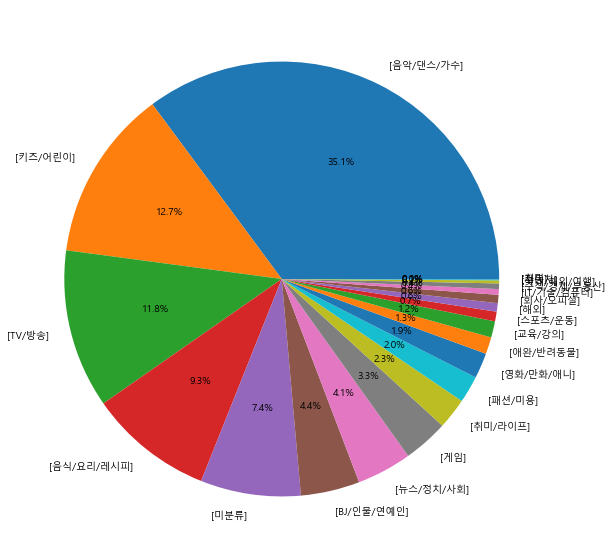

In [43]:
## 카테고리별 구독자수 시각화
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'],\
    labels=pivot_df['category'],autopct='%1.1f%%')
plt.show()

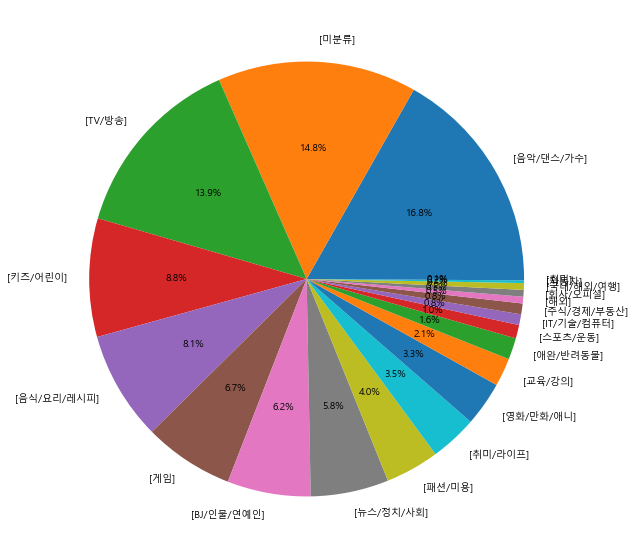

In [44]:
pivot_df = pivot_df.sort_values(by='category_count',ascending=False)
pivot_df.head()
plt.figure(figsize=(30,10))
plt.pie(pivot_df['category_count'],labels=pivot_df['category'],autopct='%1.1f%%')
plt.show()

In [ ]:
### fig 또는 figure는 전체 그래프의 크기
## Axes : 그래프가 그려지는 Figure의 하위섹션. title, X-Label, Y-Label
## Axis : Axes의 하위 요소로 그래프의 척도를 나타내는 숫자 선.
##        2차원 그래프는 X와 Y Axis, 3차원은 X,Y,Z Axis를 가짐
## Label : figure의 다양한 요소의 이름
## Legend : Axes 안에 여러개의 그림이 있는 경우에 입력 값에 따라서 각각의 Label이 존재함
## Title : 각 Axes에 주어진 이름. figure가 각각의 Title로 여러개의 Axes를 가짐,
##          Figure 또한 각각의 Title을 가짐
## Ticklabels : 각 'Axis(X,Y 또는 Z)'는 여러 개의 동일한 'Bin'으로 나눈 값의 범위
##              'Bin'은 두 가지 레벨에서 선택
## Spines : Figure의 가장자리를 의미함. 각각의 "Axes"에는 네개의 Spines가 존재함.
##          (Top, Bottom, Left, Right)
## Grid : 그래프의 다양한 점의 좌표를 쉽게 읽도록 영역을 Grid로 나눌 수 있음

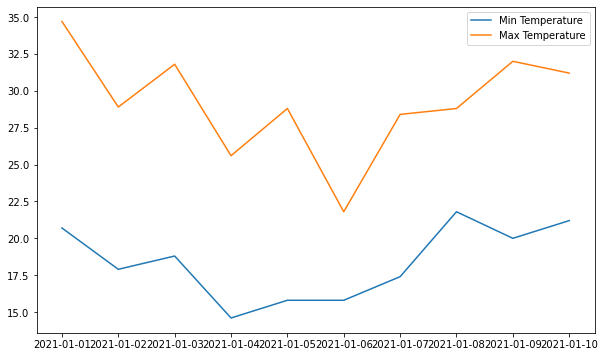

In [7]:
import matplotlib.pyplot as plt

dates = [
    '2021-01-01','2021-01-02','2021-01-03','2021-01-04','2021-01-05',
    '2021-01-06','2021-01-07','2021-01-08','2021-01-09','2021-01-10']
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 17.4, 21.8, 20.0, 21.2]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 28.4, 28.8, 32.0, 31.2]

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
axes.plot(dates, min_temperature, label='Min Temperature')
axes.plot(dates, max_temperature, label='Max Temperature')
axes.legend()
plt.show()

In [5]:
print(fig)
print(axes)

Figure(720x432)
AxesSubplot(0.125,0.125;0.775x0.755)
